In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/iris3.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [38]:
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

======================================== sepal_length ========================================


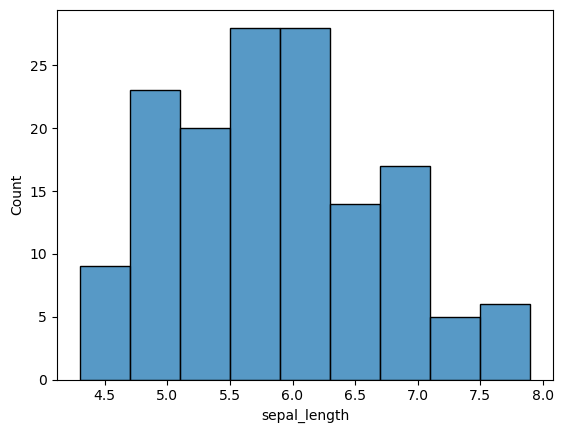

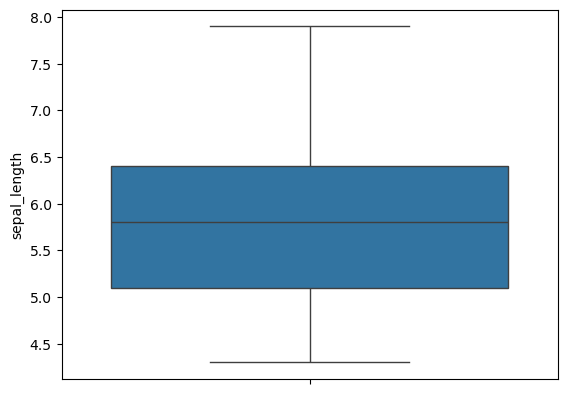

======================================== sepal_width ========================================


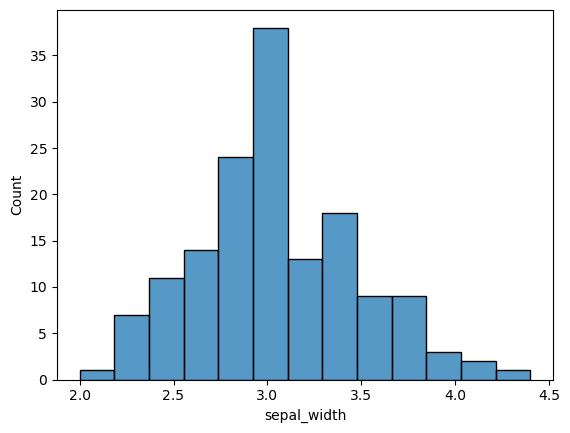

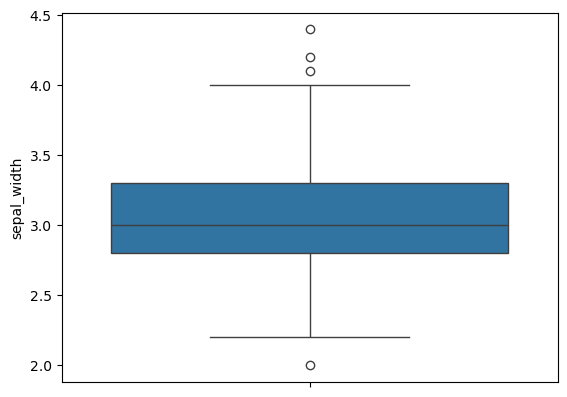

======================================== petal_length ========================================


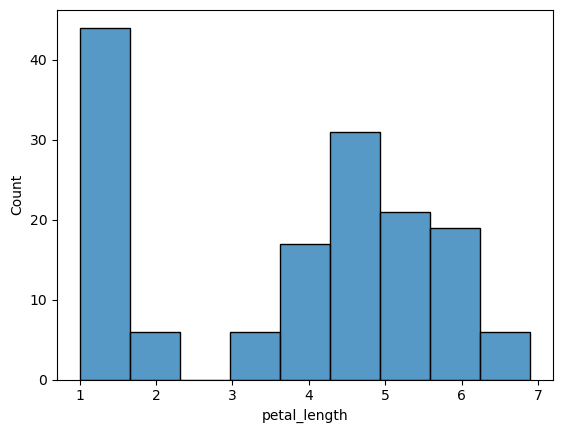

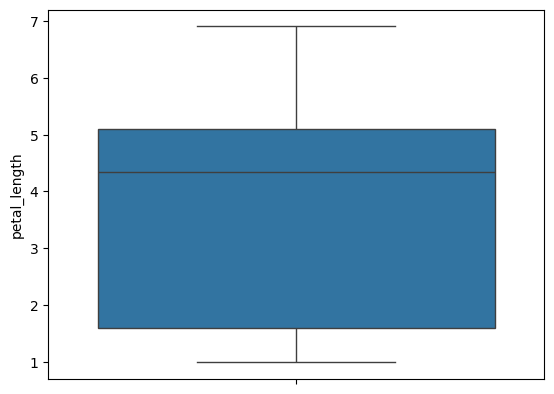

======================================== petal_width ========================================


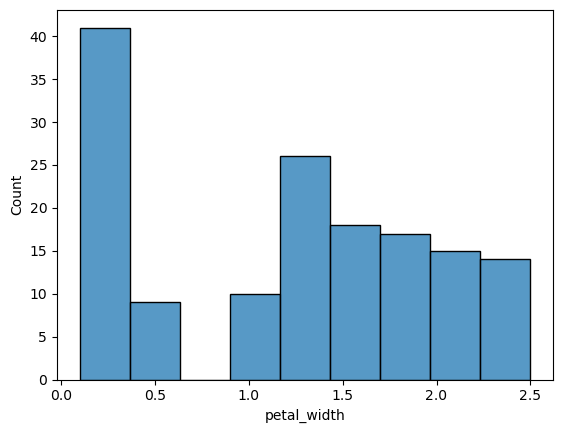

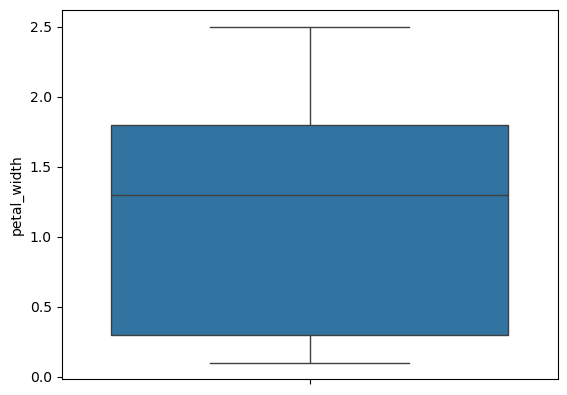

======================================== species ========================================


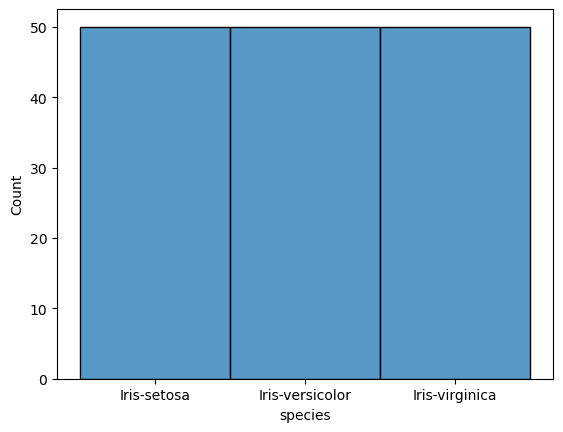

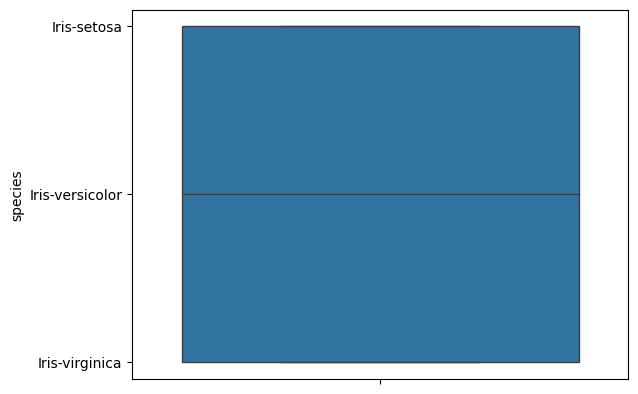

In [39]:
for col in data:
    print("="*40,col,"="*40)
    sns.histplot(data[col])
    plt.show()
    sns.boxplot(data[col])
    plt.show()

In [40]:
X = data.drop("species",axis=1)
y = data['species']

* label encoding으로 변환(sparse_categorical_crossentropy)
* one-hot encoding 변환(categorical_crossentropy )

In [41]:
y = pd.get_dummies(y)
y

,Iris-setosa,Iris-versicolor,Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [44]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
mms = MinMaxScaler()
mms.fit(X_train)
mms_X_train = mms.transform(X_train)
mms_X_test = mms.transform(X_test)
mms_X_train = pd.DataFrame(mms_X_train,columns=X_train.columns,index=X_train.index)
mms_X_test = pd.DataFrame(mms_X_test,columns=X_test.columns,index=X_test.index)

In [47]:
mms_X_train

,sepal_length,sepal_width,petal_length,petal_width
22,0.088235,0.666667,0.000000,0.041667
15,0.411765,1.000000,0.087719,0.125000
65,0.705882,0.458333,0.596491,0.541667
11,0.147059,0.583333,0.105263,0.041667
42,0.029412,0.500000,0.052632,0.041667
...,...,...,...,...
71,0.529412,0.333333,0.526316,0.500000
106,0.176471,0.208333,0.614035,0.666667
14,0.441176,0.833333,0.035088,0.041667
92,0.441176,0.250000,0.526316,0.458333


In [48]:
mms_X_test

,sepal_length,sepal_width,petal_length,petal_width
73,0.529412,0.333333,0.649123,0.458333
18,0.411765,0.750000,0.122807,0.083333
118,1.000000,0.250000,1.035088,0.916667
78,0.500000,0.375000,0.614035,0.583333
76,0.735294,0.333333,0.666667,0.541667
31,0.323529,0.583333,0.087719,0.125000
64,0.382353,0.375000,0.456140,0.500000
141,0.764706,0.458333,0.719298,0.916667
68,0.558824,0.083333,0.614035,0.583333
82,0.441176,0.291667,0.508772,0.458333


# 텐서프로우로 다중분류 분석하기

In [49]:
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.metrics import classification_report

In [50]:
model = Sequential()
model.add(Input(shape=(mms_X_train.shape[1],)))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(3,activation='softmax')) # 출력층 다중분류 시에는 출력층의 클래스 수만큼 node를 주어야 함, 활성함수는 softmax
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 267 (1.04 KB)

 Trainable params: 267 (1.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 267ms/step - accuracy: 0.3250 - loss: 1.0133 - val_accuracy: 0.3667 - val_loss: 0.9876
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3250 - loss: 1.0031 - val_accuracy: 0.3667 - val_loss: 0.9770
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3250 - loss: 0.9930 - val_accuracy: 0.3667 - val_loss: 0.9662
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3250 - loss: 0.9828 - val_accuracy: 0.3667 - val_loss: 0.9563
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3583 - loss: 0.9736 - val_accuracy: 0.4000 - val_loss: 0.9466
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4333 - loss: 0.9646 - val_accuracy: 0.5333 - val_loss: 0.9370
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5083 - loss: 0.9560 - val_accuracy: 0.5667 - val_loss: 0.9292
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5833 - loss: 0.9482 - val_accuracy: 0.6333 - val_loss

Epoch 52/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8750 - loss: 0.6985 - val_accuracy: 0.8667 - val_loss: 0.6725
Epoch 53/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8667 - loss: 0.6941 - val_accuracy: 0.8667 - val_loss: 0.6677
Epoch 54/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8583 - loss: 0.6902 - val_accuracy: 0.8667 - val_loss: 0.6629
Epoch 55/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8583 - loss: 0.6862 - val_accuracy: 0.8667 - val_loss: 0.6586
Epoch 56/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8583 - loss: 0.6819 - val_accuracy: 0.8667 - val_loss: 0.6544
Epoch 57/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8833 - loss: 0.6779 - val_accuracy: 0.8667 - val_loss: 0.6505
Epoch 58/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8833 - loss: 0.6739 - val_accuracy: 0.8667 - val_loss: 0.6460
Epoch 59/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8833 - loss: 0.6699 - val_accuracy: 0.8667 - v

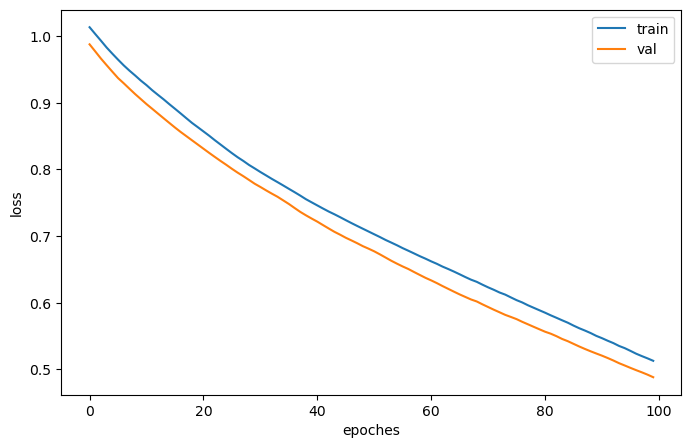

In [51]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(mms_X_train,y_train,epochs=100,batch_size=32,validation_data=(mms_X_test,y_test))
# pred = model.predict(mms_X_test)
# pred = pd.DataFrame(pred)
# pred = pred[0].apply(lambda x: 1 if x > 0.5 else 0)
# print(classification_report(y_test,pred))
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epoches")
plt.ylabel("loss")
plt.legend(['train','val'])
plt.show()

In [52]:
pred = model.predict(mms_X_test)
pred = pd.DataFrame(pred)
pred
# pred = pred[0].apply(lambda x: 1 if x > 0.5 else 0)
# print(classification_report(y_test,pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


,0,1,2
0,0.005294,0.638068,0.356638
1,0.496883,0.279808,0.223309
2,0.000008,0.051641,0.948351
3,0.004121,0.566204,0.429675
4,0.001668,0.481690,0.516642
5,0.496883,0.279808,0.223309
6,0.018127,0.646373,0.335500
7,0.000178,0.181743,0.818080
8,0.001682,0.341846,0.656472
9,0.012057,0.660184,0.327759
